In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

csv_file = "/home/eduardo/Área de trabalho/Trabalho_Final/diabetes_data.csv"
data = pd.read_csv(csv_file)
data.head()


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


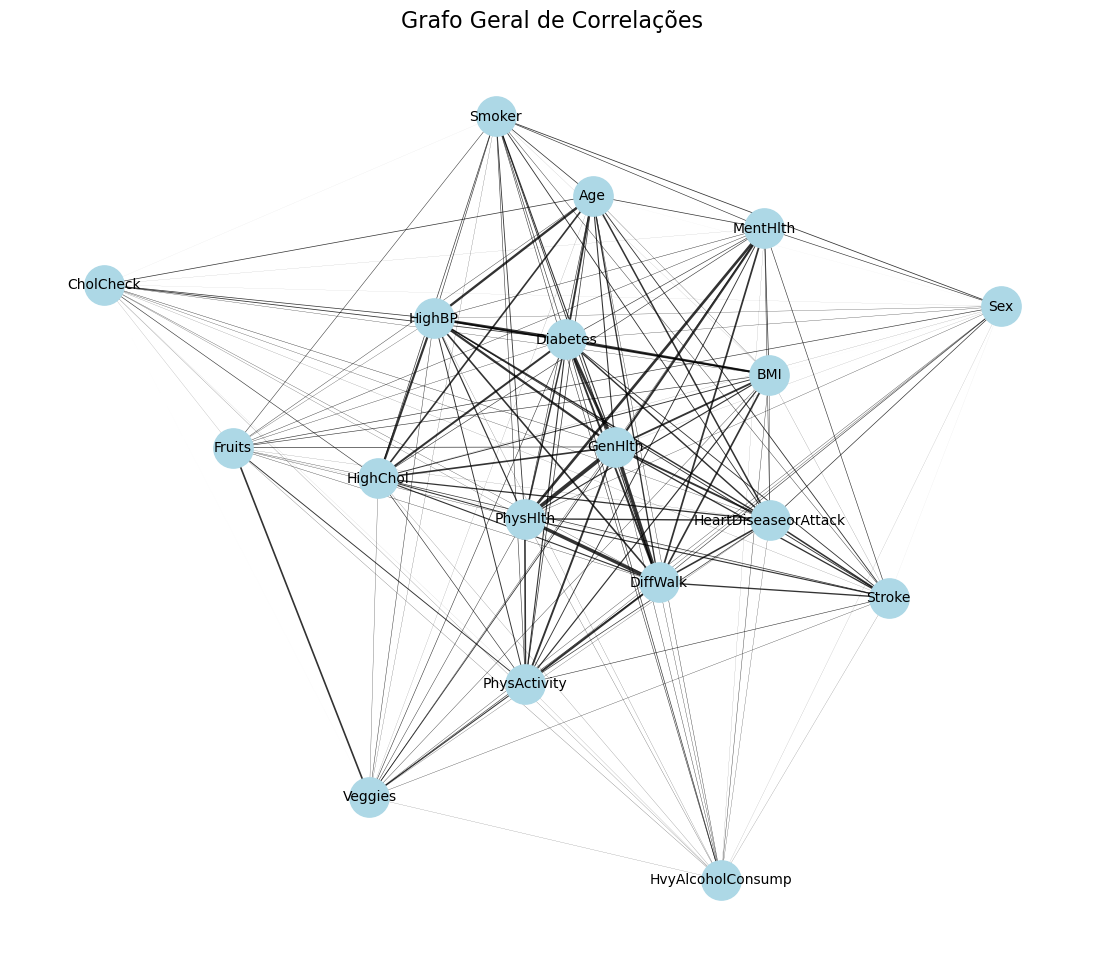

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(14, 12))

graph = nx.Graph()
columns = data.columns 
for col in columns:
    graph.add_node(col)

for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        if i < j:  
            weight = correlation_matrix.loc[col1, col2]
            if not np.isnan(weight):  
                graph.add_edge(col1, col2, weight=abs(weight))  

pos = nx.spring_layout(graph, seed=42, k=1.0)

edges = graph.edges(data=True)
nx.draw_networkx_edges(
    graph, pos, edgelist=edges,
    width=[d['weight'] * 5 for (_, _, d) in edges],
    alpha=0.8
)

nx.draw_networkx_nodes(graph, pos, node_size=800, node_color="lightblue")

labels = {node: node for node in graph.nodes()}
nx.draw_networkx_labels(
    graph, pos, labels=labels, font_size=10, font_color="black"
)

plt.axis("off")

plt.title("Grafo Geral de Correlações", fontsize=16)
plt.show()


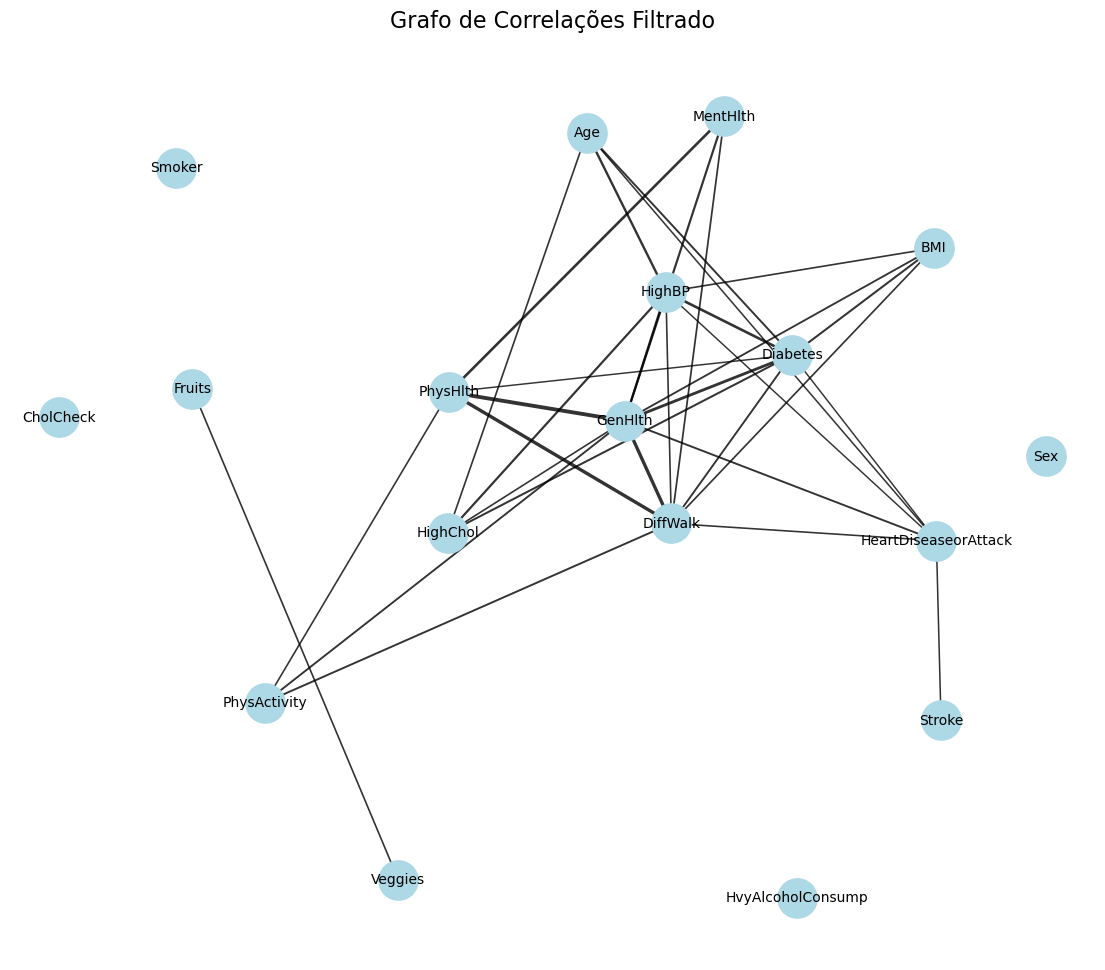

In [34]:
correlation_matrix = data.corr()

threshold = 0.2

graph = nx.Graph()
columns = data.columns
for col in columns:
    graph.add_node(col)

for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        if i < j:
            weight = correlation_matrix.loc[col1, col2]
            if abs(weight) >= threshold:  
                graph.add_edge(col1, col2, weight=abs(weight))

plt.figure(figsize=(14, 12))

pos = nx.spring_layout(graph, seed=42, k=1.0)
edges = graph.edges(data=True)

nx.draw_networkx_edges(
    graph, pos, edgelist=edges,
    width=[d['weight'] * 5 for (_, _, d) in edges],
    alpha=0.8
)

nx.draw_networkx_nodes(graph, pos, node_size=800, node_color="lightblue")

labels = {node: node for node in graph.nodes()}
nx.draw_networkx_labels(
    graph, pos, labels=labels, font_size=10, font_color="black"
)

plt.axis("off")
plt.title("Grafo de Correlações Filtrado", fontsize=16)
plt.show()


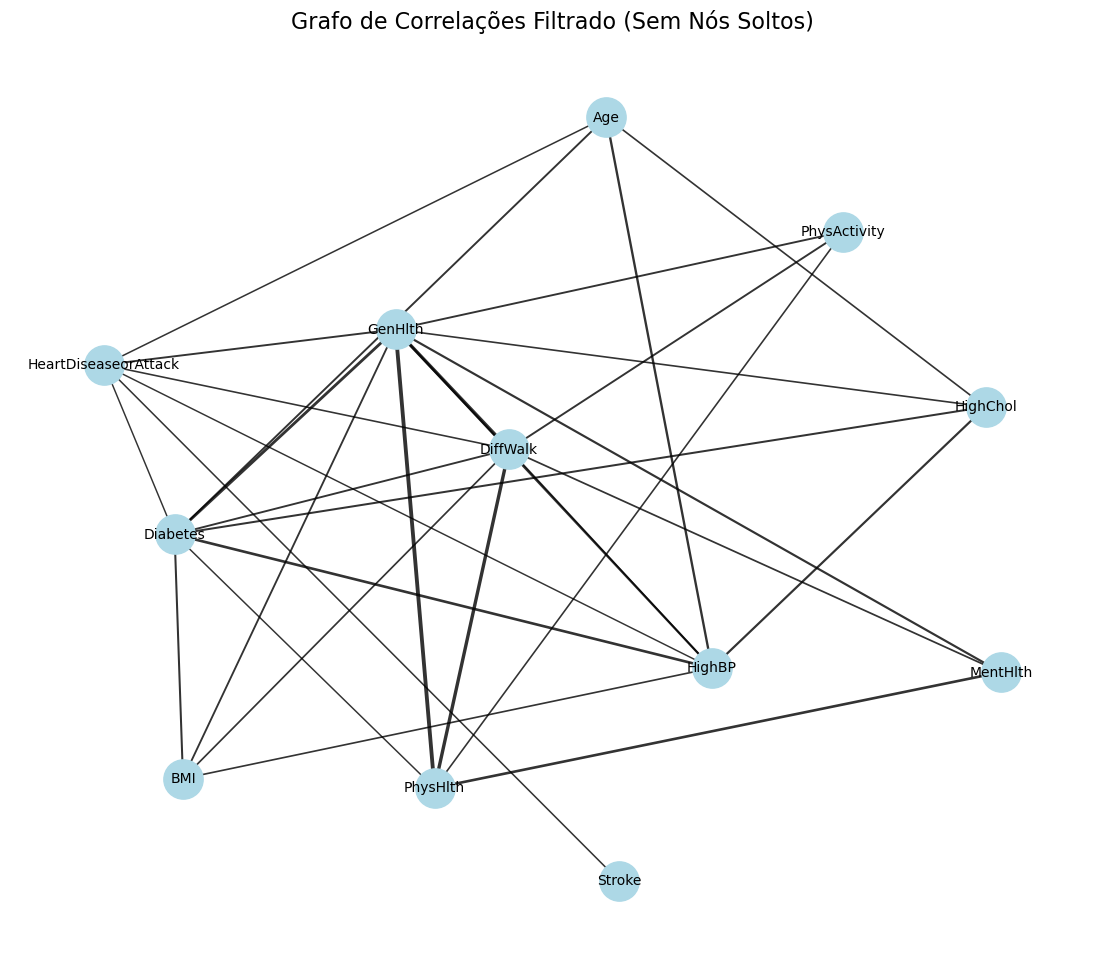

In [33]:
isolated_nodes = list(nx.isolates(graph))

graph.remove_nodes_from(isolated_nodes)

plt.figure(figsize=(14, 12))

graph.remove_nodes_from(["Veggies", "Fruits"])

pos = nx.spring_layout(graph, seed=42, k=1.8)
edges = graph.edges(data=True)

nx.draw_networkx_edges(
    graph, pos, edgelist=edges,
    width=[d['weight'] * 5 for (_, _, d) in edges],
    alpha=0.8
)

nx.draw_networkx_nodes(graph, pos, node_size=800, node_color="lightblue")

labels = {node: node for node in graph.nodes()}
nx.draw_networkx_labels(
    graph, pos, labels=labels, font_size=10, font_color="black"
)

plt.axis("off")
plt.title("Grafo de Correlações Filtrado (Sem Nós Soltos)", fontsize=16)
plt.show()
